# Customers Churn Prediction

**Kyu Cho  
October 15, 2016**

# Introduction

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses, as it's often the case that acquiring new customers is a lot more costly than retaining existing ones (in some cases, 5 to 20 times more expensive).  

Understanding what keeps customers engaged, therefore, is incredibly valuable, as it is a logical foundation from which to develop retention strategies and roll out operational practices aimed to keep customers from walking out the door. Consequently, there's growing interest among companies to develop better churn-detection techniques, leading many to look to data mining and machine learning for new and creative approaches.  

Predicting churn is particularly important for businesses w/ subscription models such as cell phone, cable, or merchant credit card processing plans. But modeling churn has wide reaching applications in many domains. For example, casinos have used predictive models to predict ideal room conditions for keeping patrons at the blackjack table and when to reward unlucky gamblers with front row seats to Celine Dion. Similarly, airlines may offer first class upgrades to complaining customers. The list goes on.  

# Table of Contents

1. Understanding Data
2. Data Cleaning
	+ Convert categorical attributes to dummy variables
3. Explorting Data
4. Hypothesis Generation
	+ Helper Functions
5. Build Model
	+ Base Model
	+ Logistic Regression - using churn cost per customer
	+ Randome Forest
	+ Naive Bayes
6. Visualizing churn cost per customer of the three estimators
7. Conclusion

# 1. Understanding Data


In [1]:
get_ipython().magic(u'matplotlib inline')

from __future__ import division
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np

import json
from IPython.display import display
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import rcParams
import matplotlib.pyplot as plt

import os
os.chdir('/home/kyu/Google Drive/Portfolio/project 106')

data = pd.read_csv("data.csv", low_memory=False)


In [2]:
display(data.shape)
display(data.head(3))
display(data.describe())
display(data.info())

# check factor variable levels
display("Checking factor variable levels")
display(data.apply(lambda x: len(x.unique())))

(3333, 21)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


None

'Checking factor variable levels'

State               51
Account Length     212
Area Code            3
Phone             3333
Int'l Plan           2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn?               2
dtype: int64

In [3]:
# Filter categorical variables
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

# Include only usefull variables
categorical_columns = [x for x in categorical_columns if x in ['Area Code', "Int'l Plan", 'VMail Plan', 'CustServ Calls', 'Churn?']]

# Frequency table 
print("Frequency Table")
for col in categorical_columns:
    print('\nFrequency table for varible %s' % col)
    print(data[col].value_counts(sort=True, dropna=False))

Frequency Table

Frequency table for varible Int'l Plan
no     3010
yes     323
Name: Int'l Plan, dtype: int64

Frequency table for varible VMail Plan
no     2411
yes     922
Name: VMail Plan, dtype: int64

Frequency table for varible Churn?
False.    2850
True.      483
Name: Churn?, dtype: int64


# 2. Data Cleaning

In [4]:
# remove unnecessary variables
data = data.drop('Phone', axis=1)

# conver yes/no to boolean inteter value
data["Int'l Plan"] = (data["Int'l Plan"] == 'yes').astype(int)
data["VMail Plan"] = (data["VMail Plan"] == 'yes').astype(int)
data["Churn?"] = (data["Churn?"] == 'True.').astype(int)

data.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
## Convert categorical attributes to dummy variables

# Generate the dummy variables
dummy_states = pd.get_dummies(data['State'], prefix='State')
dummy_area_codes = pd.get_dummies(data['Area Code'], prefix='Area_Code')

# Join the new dummy variables to the data
data = data.join(dummy_states)
data = data.join(dummy_area_codes)

# Drop the old categorical attributes
data = data.drop('State', axis=1)
data = data.drop('Area Code', axis=1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 72 columns):
Account Length    3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null int64
State_AK          3333 non-null float64
State_AL          3333 non-null float64
State_AR          3333 non-null float64
State_AZ          3333 non-null float64
State_CA          3333 non-null f

# 3. Explorting Data

In [6]:
X = data.drop('Churn?', axis=1)
Y = data['Churn?']
print("Mean of Y = " + str(np.mean(Y)))

# In our full dataset, ~14.5% of customers are churners.

Mean of Y = 0.144914491449


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)
epsilon = np.abs(np.mean(Y_train) - np.mean(Y_test))

print("Mean of Y = " + str(np.mean(Y)))
print("Mean of Y_train = " + str(np.mean(Y_train)))
print("Mean of Y_test = " + str(np.mean(Y_test)))
print("epsilon = " + str(epsilon))


# - epsilon = 0.001233 (the mean of both Y_test and Y_train and quite similar.) 

Mean of Y = 0.144914491449
Mean of Y_train = 0.144786196549
Mean of Y_test = 0.145427286357
epsilon = 0.000641089807684


In [8]:
# Reconstruct datasets
#data_train = X_train.join(Y_train)
#data_test = X_test.join(Y_test)

# Save dataset in case we need to load them later (in another project)
#data_train.to_csv('data_train.csv', index = False)
#data_test.to_csv('data_test.csv', index = False)

# 4. Hypothesis Generation

What's the best metric for comparing models? Since the classes are unbalanced, model accuracy is not enough (correct guesses / total guesses). If we were naively to predict all customers to not churn, we would have ~85% accuracy. Knowing this, we should use either precision or recall.

Because losing a customer is more costly than whatever measures are taken to prevent a customer from leaving, minimizing false negatives (saying a customer wouldn't churn and they do), is the number to minimize. Thus, recall will be our primary model metric, while still considering precision.

The real goal behind reducing customers churn is to reduce the loss of churn. In other words, we want to reduce the cost of churning customers.

The predictive models that we are going to build will not be judged on their accuracy but on their ability to reduce churn cost per customer.  
Let's first introduce the confusion matrix of the cost relative to customers churn.
- True Positive (TP) as a customer that is predicted to churn and actually churns
- True Negative (TN) as a customer that is predicted to not churn and that doesn't churn
- False Positive (FP) as a customer that is predicted to churn and actually doesn't churn
- False Negative (FN) as a customer that is predicted to not churn but actually churns

Suppose that the Life Time Value (LTV) of a customer is approximately \$1,000 (3 years at ~\$30/month subscription plan). This means that each customer that quit the company means \$1,000 loss for the company.    
When a customer is detected as churning, we offer him an incentive of \$100, to make him stay longer with the operator. This is a loss for the company of \$100 that is less dramatic than loosing \$1,000.  
Not all customers that are receiving the \$100 offer will accept it. We suppose to have a 50% chance the customer accept the offer, which in term of mean loss, is \$550 per customer that is detected to churn and decide to stay 0.5 x \$1,000 + 0.5 x \$100.  

Here I summarize the churn costs in a confusion matrix way:
- TP costs the company \$550
- TN costs the company \$0
- FP costs the company \$100
- FN costs the company \$1,000

Our ultimate predictor must minimize the total churn cost given the costs list below. For calculation convenience, we will devide the total cost by the number of customers and minimize the churn cost per customer (CCpC).   

## Helper Functions

- Following function calculates the CCpC given an estimator, the input/output values, and returns the minimum churn cost per customer, and the corresponding probability threshold:


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

# Confusion matrix cost
cmc = np.array([[0, 1000], [100, 550]])

# Get the confusion matrix as costs
def confusion_matrix_cost(Y_pred, Y_obs):
    return confusion_matrix(Y_pred, Y_obs, labels = [0, 1]) * cmc

# Calculate the total Churn Cost per Customer given Y predicted and observed
def calculate_ccpc(Y_pred, Y_obs):
    return np.sum(confusion_matrix_cost(Y_pred, Y_obs)) / float(len(Y_obs))

# Calculate accuracy by looking at the mean of correct predictions
# Y observed and predicted can be given in any order
def calculate_accuracy(Y_1, Y_2):
    return np.mean(np.logical_not(np.logical_xor(Y_1, Y_2)).astype(int))

# Predict churn given a probabilistic threshold t
def predict_with_threshold(model, X, t=0.5):
    return (model.predict_proba(X)[:,1] >= t).astype(int)

# Get the min churn cost per customer, and the associated probability threshold
def churn_cost_per_customer_and_threshold(model, X, Y):
    min_cost, optimal_t = np.max(cmc), 0
    
    for t in np.arange(0, 1.01, 0.01):
        Y_predicted = predict_with_threshold(model, X, t)
        ccpc = calculate_ccpc(Y_predicted, Y)
        
        if ccpc < min_cost:
            min_cost = ccpc
            optimal_t = t
    
    return min_cost, optimal_t

# Only the churn cost per customer
def churn_cost_per_customer(model, X, Y):
    return churn_cost_per_customer_and_threshold(model, X, Y)[0]

# Scorer used in GridSearchCV that minimizes the churn_cost_per_customer (=> maximize the inverse)
def scorer_based_on_churn_cost_per_customer(model, X, Y):
    return 1.0 / churn_cost_per_customer(model, X, Y)

# POC plot function
import matplotlib.pyplot as plt
def plot_roc(scores, max_score, max_score_threshold):
    # plot
    thresholds = np.arange(0, 1.01, 0.01) 
    plt.plot(thresholds, scores, label = 'Evolution of score')

    # plot the cross pt
    plt.plot([0, max_score_threshold], [max_score, max_score], color = 'r', alpha = 0.2, label = 'Max score')
    plt.plot([max_score_threshold, max_score_threshold], [0, max_score], 'r--', alpha = 0.2)
    plt.plot([max_score_threshold], [max_score], 'bo')

    # helper box
    plt.legend()
    plt.ylim(0, 1)
    plt.xlabel('Probability Threshold')
    plt.ylabel('Model accuracy')
    plt.title('Evolution of model accuracy depending on probability threshold')
    plt.show()

# 5. Build Model

## Base Model

To better judge on the churn costs per customer, let's consider two extreme cases: The first one is about a dummy estimator that predicts all customers are churning, and an other one with no customers churning.

In [10]:
ccpc_all_churn = calculate_ccpc(np.ones(len(Y_test)), Y_test)
ccpc_no_churn = calculate_ccpc(np.zeros(len(Y_test)), Y_test)

print("Churn cost per customer All churn = " + str(ccpc_all_churn))
print("Churn cost per customer No churn = " + str(ccpc_no_churn))

Churn cost per customer All churn = 165.442278861
Churn cost per customer No churn = 145.427286357


## Logistic Regression - Normal

In [11]:
from sklearn.linear_model import LogisticRegression

lr_cf = LogisticRegression()
lr_gs = GridSearchCV(lr_cf, param_grid={'C': [10**i for i in range(-3, 3)], 'penalty': ['l1', 'l2']}, cv=5)
lr_gs.fit(X_train, Y_train)
lr_est = lr_gs.best_estimator_

print("Using LR params %s produce the best model accuracy: %f" % (lr_gs.best_params_, lr_gs.best_score_))
print("Accuracy on training data = %f" % lr_est.score(X_train, Y_train))
print("Accuracy on test data = %f" % lr_est.score(X_test, Y_test))

Using LR params {'penalty': 'l1', 'C': 1} produce the best model accuracy: 0.864591
Accuracy on training data = 0.870218
Accuracy on test data = 0.859070


- The accuracy on the test dataset is aproximately the same as our dummy estimator.
    + the optimal hyperparameters of the logistic regression model, did worse than just predicting all customers as not churning (our dummy estimator)
    + the problem comes from the accuracy of the prediction, that uses a probability threshold of 0.5 in an unbalanced dataset.
    + find the probability threshold that maximizes accuracy.
    + plotting the evolution of our LR estimator (with hyperparameters as found with grid search) on different probability thresholds.

Max accuracy occurs at probability threshold 0.53, with score of 0.87
Churn Cost Per Costomer 134.78


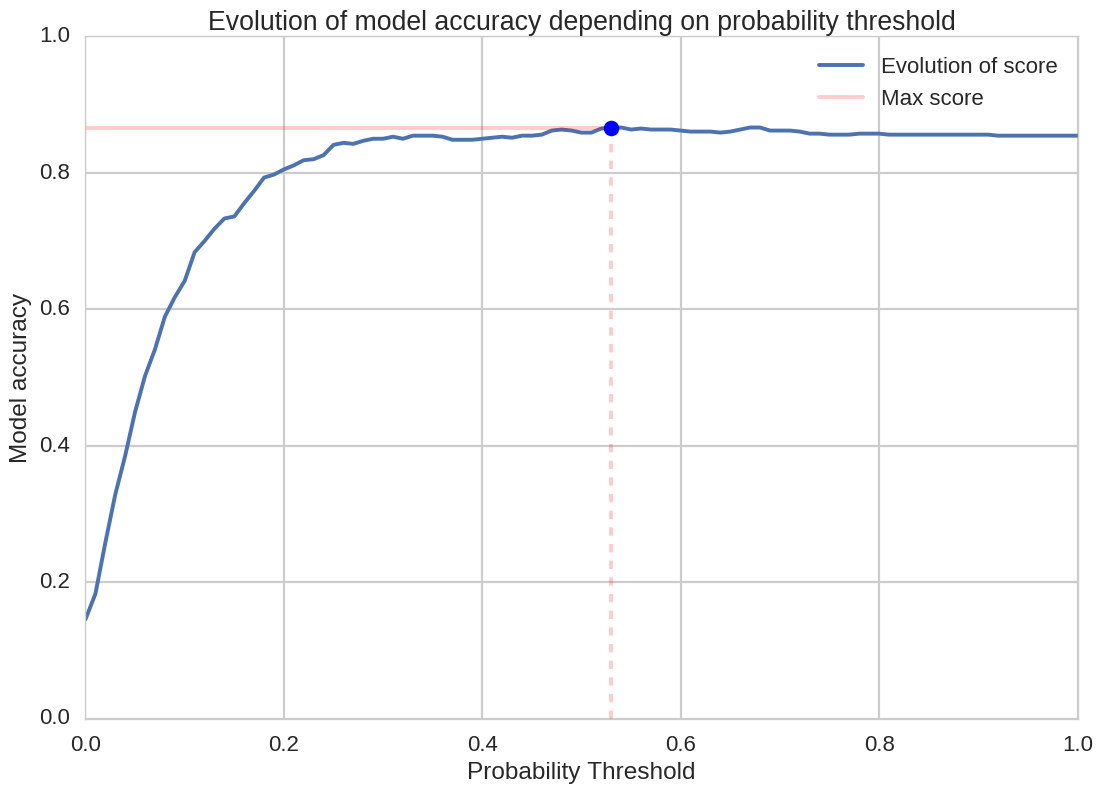

In [12]:
# The prob. thresholds
thresholds = np.arange(0, 1.01, 0.01) 
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(lr_est, X_test, t)
    right_predictions = (Y_predicted == Y_test.values)
    scores.append(np.mean(right_predictions.astype(int)))

# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)] # argmax returnx idx in scores
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))
print("Churn Cost Per Costomer %0.2f" % calculate_ccpc(predict_with_threshold(lr_est, X_test, max_score_threshold), Y_test))

# plot roc
plot_roc(scores, max_score, max_score_threshold)

# Use the churn cost per customer to find the best estimation.

## Logistic Regression - using churn cost per customer

In [13]:
lr_gs = GridSearchCV(lr_cf, 
                     param_grid={'C': [10**i for i in range(-3, 3)], 'penalty': ['l1', 'l2']}, 
                     cv=5, 
                     scoring=scorer_based_on_churn_cost_per_customer)
lr_gs.fit(X_train, Y_train)
lr_est = lr_gs.best_estimator_
print("Using LR params %s help get the minimum CCpC" % lr_gs.best_params_)

Using LR params {'penalty': 'l1', 'C': 1} help get the minimum CCpC


Max accuracy occurs at probability threshold 0.53, with score of 0.87
Churn Cost Per Costomer 134.78


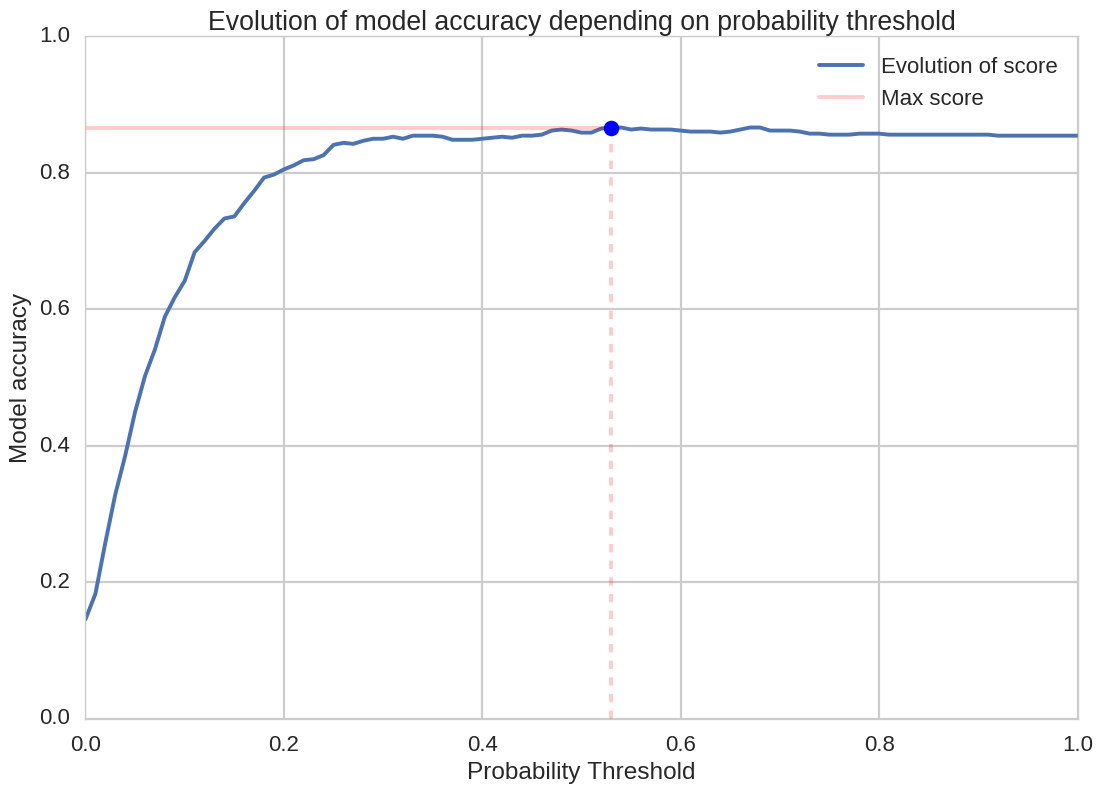

In [14]:
# The prob. thresholds
thresholds = np.arange(0, 1.01, 0.01) 
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(lr_est, X_test, t)
    right_predictions = (Y_predicted == Y_test.values)
    scores.append(np.mean(right_predictions.astype(int)))

# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)] # argmax returnx idx in scores
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))
print("Churn Cost Per Costomer %0.2f" % calculate_ccpc(predict_with_threshold(lr_est, X_test, max_score_threshold), Y_test))

# plot roc
plot_roc(scores, max_score, max_score_threshold)

## Randome Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cf = RandomForestClassifier(n_jobs=-1)
rf_gs = GridSearchCV(rf_cf, param_grid={'n_estimators': [100, 500]}, 
                     cv=5, 
                     scoring=scorer_based_on_churn_cost_per_customer)
rf_gs.fit(X_train, Y_train)
rf_est = rf_gs.best_estimator_

print "Using RF params %s produce the best model accuracy: %f" % (rf_gs.best_params_, rf_gs.best_score_)
print "Accuracy on training data = %f" % rf_est.score(X_train, Y_train)
print "Accuracy on test data = %f" % rf_est.score(X_test, Y_test)

Using RF params {'n_estimators': 500} produce the best model accuracy: 0.010669
Accuracy on training data = 1.000000
Accuracy on test data = 0.941529


In [ ]:
# The prob. thresholds
thresholds = np.arange(0, 1.01, 0.01) 
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(rf_est, X_test, t)
    right_predictions = (Y_predicted == Y_test.values)
    scores.append(np.mean(right_predictions.astype(int)))

# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)] # argmax returnx idx in scores
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))
print("Churn Cost Per Costomer %0.2f" % calculate_ccpc(predict_with_threshold(rf_est, X_test, max_score_threshold), Y_test))

# plot roc
plot_roc(scores, max_score, max_score_threshold)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_cf = GaussianNB()
nb_gs = GridSearchCV(nb_cf, 
                     param_grid={}, 
                     cv=5, 
                     scoring=scorer_based_on_churn_cost_per_customer)
nb_gs.fit(X_train, Y_train)
nb_est = nb_gs.best_estimator_

print "Accuracy on training data = %f" % nb_est.score(X_train, Y_train)
print "Accuracy on test data = %f" % nb_est.score(X_test, Y_test)

In [ ]:
# The prob. thresholds
thresholds = np.arange(0, 1.01, 0.01) 
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(nb_est, X_test, t)
    right_predictions = (Y_predicted == Y_test.values)
    scores.append(np.mean(right_predictions.astype(int)))

# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)] # argmax returnx idx in scores
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))
print("Churn Cost Per Costomer %0.2f" % calculate_ccpc(predict_with_threshold(nb_est, X_test, max_score_threshold), Y_test))

# plot roc
plot_roc(scores, max_score, max_score_threshold)

# 6. Visualizing churn cost per customer of the three estimators

In [ ]:
thresholds = np.arange(0, 1.01, 0.01)

lr_ccpc = [calculate_ccpc(predict_with_threshold(lr_est, X_test, t), Y_test) for t in thresholds]
rf_ccpc = [calculate_ccpc(predict_with_threshold(rf_est, X_test, t), Y_test) for t in thresholds]
nb_ccpc = [calculate_ccpc(predict_with_threshold(nb_est, X_test, t), Y_test) for t in thresholds]

plt.plot(thresholds, lr_ccpc, color = '#0090ff', label = "Logistic Regression Estimator")
plt.plot(thresholds, rf_ccpc, color = '#aa4400', label = "Random Forest Estimator")
plt.plot(thresholds, nb_ccpc, color = '#44aa00', label = "Naive Bayes Estimator")
plt.legend(loc = 'lower right')
plt.xlabel('Probability Threshold')
plt.ylabel('Churn Cost per Customer')
plt.title('Evolution of CCpC per probability threshold of the three estimators')
plt.show()

In [ ]:
print "Min CCpC for RF estimator is $%3.2f" % np.min(rf_ccpc)
print "Corresponding probability threshold is %0.2f" % thresholds[np.argmin(rf_ccpc)]

# 7. Conclusion

- In our study, we have 3333 customers. As we need \$92.65 for every customer in order to cover the customers churn.
    + need to have ~\$318,000 at hand to cover churn costs. 
- Not predicting churns (not having any predictor) will require ~\$480,000 at hand to cover the same population potential churns! 
    + reduction of cost of ~\$48.50 per customer for the company.

In this study, we found out that the importance of using the cost reduction of customer churns as a performance measure of the estimator, rather than just using the accuracy of the churn estimator.  
This led to completely different estimators, that perform completely differently.  
In a business objective point of view, using cost reduction takes more sense.  
This shows how important it is to have domain knowledge in order to better discuss the objectives and explain results.  
Using our churn predictor, the company makes \$48.50 saving per customer! If the company has 10,000,000 customers, and using our estimator, it could save \$485M!